# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


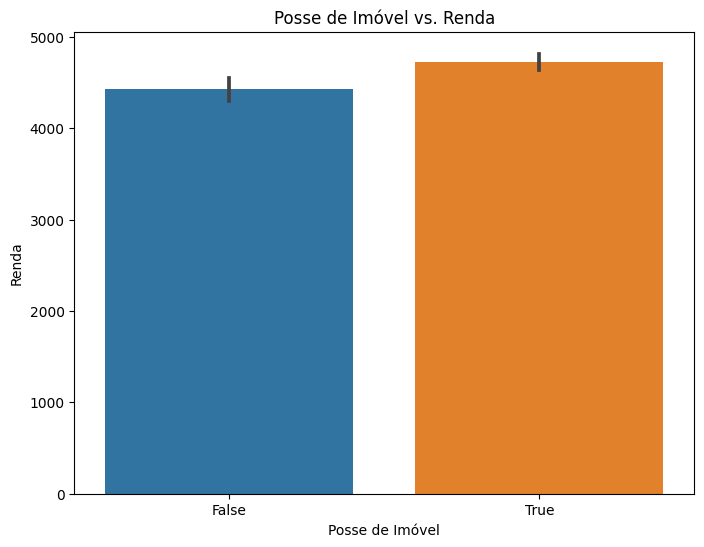

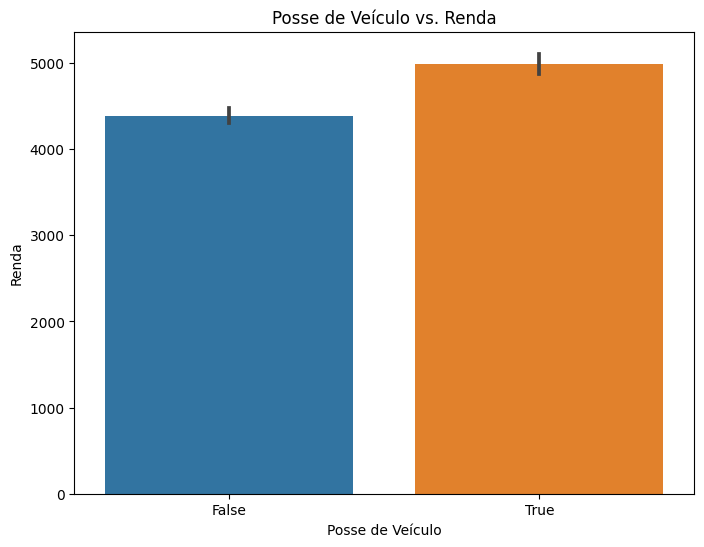

In [3]:
# Gráfico de barras para "posse_de_imovel" vs. "renda"
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='posse_de_imovel', y='renda')
plt.title('Posse de Imóvel vs. Renda')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Renda')
plt.show()

# Gráfico de barras para "posse_de_veiculo" vs. "renda"
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='posse_de_veiculo', y='renda')
plt.title('Posse de Veículo vs. Renda')
plt.xlabel('Posse de Veículo')
plt.ylabel('Renda')
plt.show()

In [4]:
df.posse_de_imovel.unique()

array([ True, False])

In [5]:
df.posse_de_veiculo.unique()

array([False,  True])

In [6]:
df_reduzido = df[['posse_de_imovel', 'posse_de_veiculo', 'renda']]
df_reduzido.head(3)

,posse_de_imovel,posse_de_veiculo,renda
0,True,False,3369.24
1,True,True,6096.14
2,True,True,5658.98


**Analisando a relação entre posse_de_imovel e renda**

In [7]:
# Divisão dos dados para posse_de_imovel
X = df_reduzido.drop(['renda', 'posse_de_veiculo'], axis=1)  # Variável preditora
y = df_reduzido['renda']  # Variável dependente

In [8]:
# Criando o modelo de regressão
model = LinearRegression()

# treinamento do modelo
model.fit(X, y)

LinearRegression()

In [9]:
# Fazendo previsões
y_pred = model.predict(X)

In [10]:
# Calculando o R² e o MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R²:", r2)
print("MSE:", mse)

R²: 0.0008896623227181433
MSE: 21403189.44037691


In [11]:
# Criando o modelo de Árvore de Decisão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tree_model = DecisionTreeRegressor()

# Treinando o modelo nos dados de treinamento
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
# Previsões nos dados de teste
y_pred = tree_model.predict(X_test)

# Calculando o R² e o MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R²:", r2)
print("MSE:", mse)

R²: -0.001744862608321407
MSE: 25806841.399278868


In [13]:
df[['renda', 'posse_de_veiculo', 'posse_de_imovel']].corr()

,renda,posse_de_veiculo,posse_de_imovel
renda,1.000000,0.063414,0.029827
posse_de_veiculo,0.063414,1.000000,-0.014727
posse_de_imovel,0.029827,-0.014727,1.000000


- Podemos perceber pelas análise feitas que as variáveis posse_de_veiculo e posse_de_imovel, não são boas preditoras da veriável target
- E não parecem discriminar a renda de forma estatisticamente significante.